## Task 1.

SVD libraries

In [114]:
import numpy as np
from scipy.sparse.linalg import svds
from sklearn.utils.extmath import randomized_svd
import matplotlib.pylab as plt

In [89]:
elementsNumber = 2_000
requestedRank = 2
matrix_a = np.random.normal(size=(elementsNumber, elementsNumber))

In [3]:
%%timeit
np.linalg.svd(matrix_a) # Numpy

3.12 s ± 423 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit
svds(matrix_a, k=2)  # Scipy

772 ms ± 114 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%%timeit
randomized_svd(matrix_a, n_components=elementsNumber)    # Scikit-learn

7.99 s ± 765 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [108]:
result = lambda Upper, Center, Lower, requestedRank: Upper[: , :requestedRank] @ np.diag(Center[:requestedRank])  @ Lower[:requestedRank, :]

In [91]:
A_np = result(*np.linalg.svd(matrix_a), requestedRank)

In [92]:
A_scipy = result(*svds(matrix_a, k=2), requestedRank)

In [93]:
A_sklearn = result(*randomized_svd(matrix_a, n_components=elementsNumber), requestedRank)

In [94]:
for _type, res_matrix in {"numpy": A_np, "scipy": A_scipy, "sklearn": A_sklearn}.items():
    print("Norm for {} is {}".format(
        _type,
        np.linalg.norm(res_matrix - matrix_a, ord = 'fro')
    ))

Norm for numpy is 1998.0177829527647
Norm for scipy is 1998.0177829527647
Norm for sklearn is 1998.0177829527647


In [97]:
del _type, res_matrix, A_sklearn, A_np, elementsNumber, requestedRank, matrix_a

## Task 3.
Consider the matrix ...

In [119]:
matrix_a = np.array([
    [-2, 11],
    [-10, 5]
], dtype=float)
U, S, V = np.linalg.svd(matrix_a)
assert np.all(np.isclose(result(U,S,V,2), matrix_a))

U, V - вращение

S - умножение

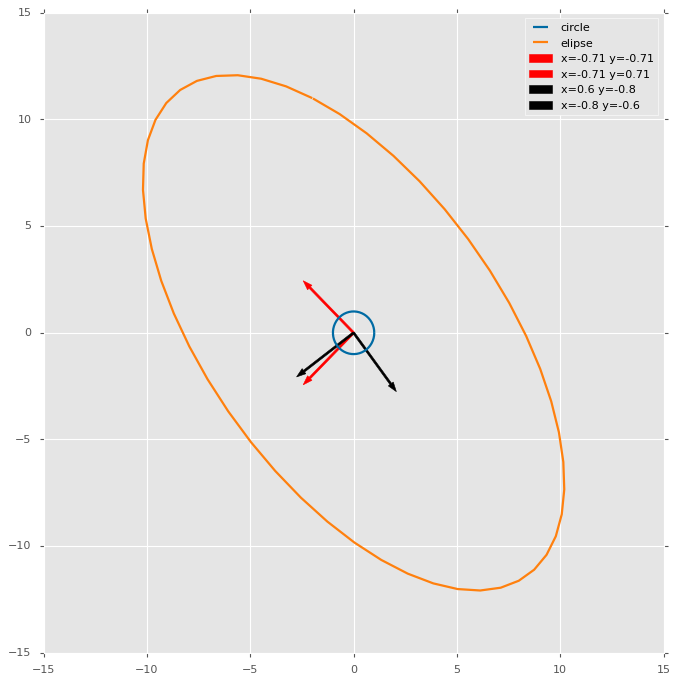

Norm Frob is 15.811388300841895
Norm 2 is 14.142135623730947
Inversion is: [[ 0.05 -0.11]
 [ 0.1  -0.02]]
lambda(1,2) = : [1.5+9.88685997j 1.5-9.88685997j]


In [211]:
A = np.asmatrix(matrix_a)
phi = np.linspace(0, 6.28, 50)
x = np.cos(phi)
y = np.sin(phi)
space = np.matrix((x,y))
result = space.T @ A
plt.figure(figsize=(10,10))
plt.plot(x, y, label = 'circle')
plt.plot(result[:, 0], result[:, 1], label='elipse')
plt.arrow(0, 0, 3*U[0,0], 3*U[0,1], label=f"x={round(U[0,0],2)} y={round(U[0,1],2)}", width = 0.1, color='red')
plt.arrow(0, 0, 3*U[0,1], 3*U[1,1], label=f"x={round(U[1,0],2)} y={round(U[1,1],2)}", width = 0.1, color='red')
plt.arrow(0, 0, 3*V[0,0], 3*V[0,1], label=f"x={round(V[0,0],2)} y={round(V[0,1],2)}", width = 0.1, color='black')
plt.arrow(0, 0, 3*V[0,1], 3*V[1,1], label=f"x={round(V[1,0],2)} y={round(V[1,1],2)}", width = 0.1, color='black')
plt.legend()
plt.show()
print(f"Norm Frob is {np.linalg.norm(S)}")
print(f"Norm 2 is {max(S)}")
print(f"Inversion is: {V @ np.diag(S ** -1) @ U}")
assert np.all(np.isclose(V @ np.diag(S ** -1) @ U, np.linalg.inv(A)))
print(f"lambda(1,2) = :", np.linalg.eig(A)[0])

In [219]:
del A, phi, x, y, space, result

### Task5

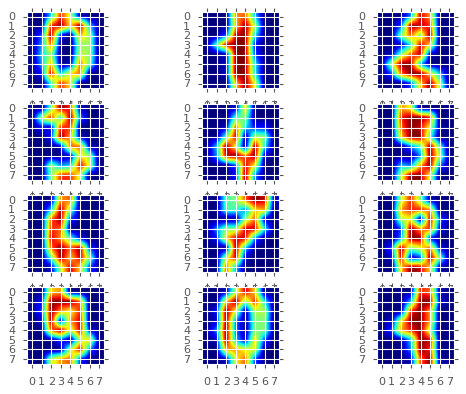

In [230]:
from sklearn.datasets import load_digits

digits = load_digits()
A = digits.data
y = digits.target

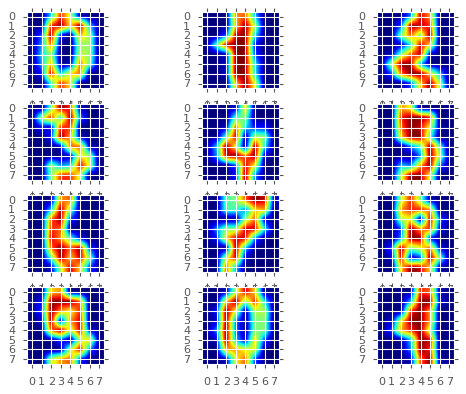

In [231]:
rows = 4
columns = 3
fig, ax = plt.subplots(rows, columns)
for row in range(rows):
    for column in range(columns):
        ax[row, column].imshow(A[row * columns + column].reshape(8,8))

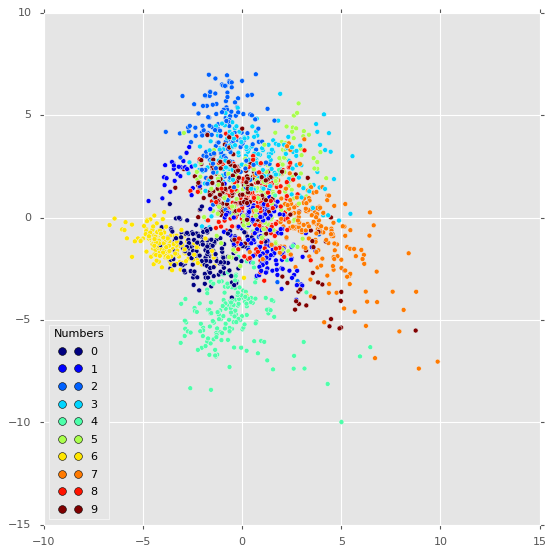

In [254]:
from sklearn.preprocessing import scale
A_normed = scale(A)
U, S, V = svds(A_normed, k=2)
transformed = U * S
plt.figure(figsize=(8, 8))
scatter = plt.scatter(transformed[:, 0], transformed[:, 1], c=y, label=y)
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Numbers")